In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.animation as animation

# seeding
np.random.seed(6)

In [5]:
def check_complete(matrix):
    # check if a graph represented by adjacency matrix is complete
    n = len(matrix)
    for i in range(n):
        for j in range(i + 1, n):
            if matrix[i][j] == 0:
                return False
    return True


def forward(initial_state, n, h, nodes, thresh):

    toConnect = []
    for j in nodes:
        connections = 0
        disconnection = 0
        nodeX = None
        nodeY = None
        for comb in itertools.combinations(j, 2):
            x = comb[0]
            y = comb[1]
            if initial_state[x][y] == 1:
                connections += 1
            else:
                nodeX = x
                nodeY = y
                disconnection += 1
            # early stopping if 2 edges are disconnected
            if disconnection > 1:
                break
        if connections == thresh - 1:
            toConnect.append((nodeX, nodeY))

    # making connections
    for i in toConnect:
        nodeX = i[0]
        nodeY = i[1]
        initial_state[nodeX][nodeY] = 1

    # whether the process stabilized
    return len(toConnect) == 0

def trial(num_sim, n, h, p, estimated_prob, nodes, thresh):
        success = 0
        for _ in range(num_sim):
            adjacency_matrix = np.zeros((n, n))
            for i in range(n):
                for j in range(i + 1, n):
                    if np.random.random_sample() < p:
                        adjacency_matrix[i][j] = 1
            stabilized = False
            while not stabilized:
                stabilized = forward(adjacency_matrix, n, h, nodes, thresh)
            if check_complete(adjacency_matrix):
                success += 1
        estimated_prob.append(success / num_sim)

In [ ]:
%%timeit -r1
num_sim = 2
estimated_prob = []

h = 4
n = 110
prob_space = np.arange(0, 1, 0.1)
nodes = list(itertools.combinations([i for i in range(n)], h))
thresh = h * (h - 1) // 2
for p in prob_space:
    # mapping a complete graph to a list of coordinates
    # simulate ER graph generation
    trial(num_sim, n, h, p, estimated_prob, nodes, thresh)

Text(0.5, 1.0, 'estimated')

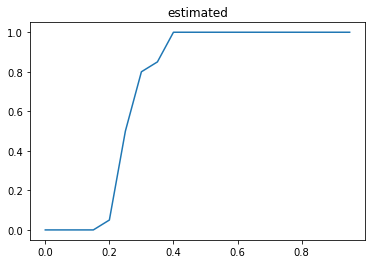

In [78]:
plt.plot(prob_space, estimated_prob)
plt.title("estimated")

In [177]:
def trial_plot(num_sim, n, h, p, estimated_prob, nodes, thresh):
        success = 0
        toPlot = []
        for _ in range(num_sim):
            adjacency_matrix = np.zeros((n, n))
            for i in range(n):
                for j in range(i + 1, n):
                    if np.random.random_sample() < p:
                        adjacency_matrix[i][j] = 1
            stabilized = False
            while not stabilized:
                toPlot.append(np.copy(adjacency_matrix))
                stabilized = forward(adjacency_matrix, n, h, nodes, thresh)
            if check_complete(adjacency_matrix):
                success += 1
        estimated_prob.append(success / num_sim)
        return toPlot

In [182]:
num_sim = 20
estimated_prob = []

h = 4
n = 60
prob_space = np.arange(0, 1, 0.01)
nodes = list(itertools.combinations([i for i in range(n)], h))
thresh = h * (h - 1) // 2
out = trial_plot(30,n,h,0.25,estimated_prob,nodes,thresh)
titled = [30, n, h, 0.25]

In [183]:
len(out)

90

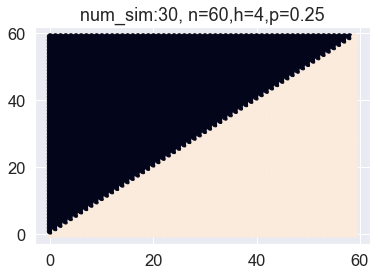

In [185]:
def main():
    numframes = 100
    numpoints = 10
    x = []
    y = []
    color = []
    for i in range(len(out[0])):
        for j in range(len(out[0])):
            if out[0][i][j]==1:
                x.append(i)
                y.append(j)
                color.append(0)
            else:
                x.append(i)
                y.append(j)
                color.append(1)
            
    fig = plt.figure()
    scat = plt.scatter(x, y, c=color)
    plt.title(f"num_sim:{titled[0]}, n={n},h={h},p={titled[3]}")
    ani = animation.FuncAnimation(fig, update_plot, frames=range(len(out)),
                                  fargs=(out, scat, color),interval=160)
    return ani

def update_plot(i, data, scat, color):
    pos = 0
    for h in range(len(data[i])):
        for j in range(len(data[i])):
            if out[i][h][j]==1:
                color[pos] = 0
            else:
                color[pos] =1
            pos+=1
            
    scat.set_array(np.array(color))
    return scat,

main()


In [181]:
fig.title

AttributeError: 'Figure' object has no attribute 'title'